In [ ]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

## Suhu Sealing Vertikal Bawah

In [ ]:
# Load data from Excel file

file_path = '/content/data_mean187window_vbtemp.csv' #Mendefinisikan variabel file_path yang berisi jalur file Excel yang akan dimuat

data = pd.read_csv(file_path) #Menggunakan fungsi read_excel dari pandas untuk membaca file Excel di jalur yang telah ditentukan (file_path) dan menyimpannya ke dalam variabel data.

data.head() #Menggunakan metode head() pada DataFrame untuk menampilkan beberapa baris pertama dari data yang telah dimuat

,datetime,suhu_sealing_vertical_bawah
0,2023-09-01 06:29:25,209.7
1,2023-09-01 06:31:14,209.7
2,2023-09-01 06:36:14,209.7
3,2023-09-01 06:41:14,209.7
4,2023-09-01 06:46:14,209.7


In [ ]:
data['datetime'] = pd.to_datetime(data['datetime']) #Baris kode ini digunakan untuk mengonversi kolom dengan nama 'times' dalam DataFrame data menjadi tipe data datetime menggunakan fungsi pd.to_datetime

In [ ]:
print("Rows and Columns = ", data.shape) #Ini memberikan informasi tentang ukuran (dimensi) DataFrame df.

Rows and Columns =  (7622, 2)


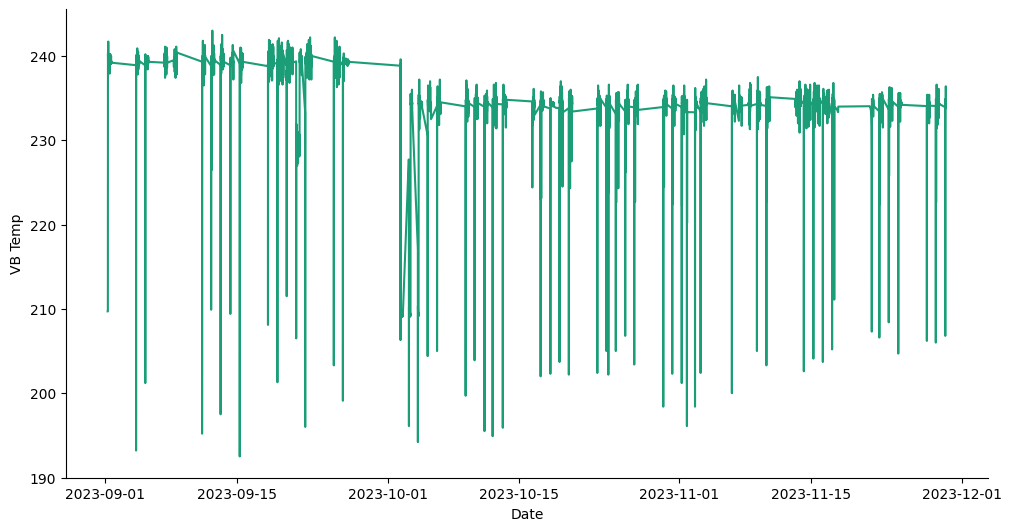

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_bawah']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('VB Temp')

In [ ]:
from sklearn.model_selection import train_test_split


train_size = 0.95
train_data, validation_data = train_test_split(data, train_size=train_size, shuffle=False)



In [ ]:
# Print validation data
train_data.head()
train_data.shape
print(train_data)

                datetime  suhu_sealing_vertical_bawah
0    2023-09-01 06:29:25                        209.7
1    2023-09-01 06:31:14                        209.7
2    2023-09-01 06:36:14                        209.7
3    2023-09-01 06:41:14                        209.7
4    2023-09-01 06:46:14                        209.7
...                  ...                          ...
7235 2023-11-23 11:26:58                        234.4
7236 2023-11-23 11:31:58                        234.4
7237 2023-11-23 11:36:58                        234.3
7238 2023-11-23 11:41:58                        234.2
7239 2023-11-23 11:46:58                        234.4

[7240 rows x 2 columns]


In [ ]:
validation_data.head()
validation_data.shape
print(validation_data)

                datetime  suhu_sealing_vertical_bawah
7240 2023-11-23 11:51:58                        234.5
7241 2023-11-23 11:56:58                        234.3
7242 2023-11-23 12:01:58                        234.4
7243 2023-11-23 12:06:58                        234.3
7244 2023-11-23 12:11:58                        234.2
...                  ...                          ...
7617 2023-11-29 07:38:19                        233.9
7618 2023-11-29 07:43:19                        234.2
7619 2023-11-29 07:48:19                        234.5
7620 2023-11-29 07:53:19                        234.4
7621 2023-11-29 07:58:19                        234.4

[382 rows x 2 columns]


In [ ]:
# Rename columns for consistency
train_data = train_data.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_bawah': 'y'})
validation_data = validation_data.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_bawah': 'y'})

future_df = pd.DataFrame({'ds': validation_data['ds']})

# Inisialisasi model SARIMAX
model = SARIMAX(train_data['y'], dataorder=(1,1,1), seasonal_order=(0,1,1,12)) #order dan seasonal order bisa diganti; seasonalitynya seharusnya lebih baik 12 diganti jadi 72 (seasonality setengah hari), namun RAM colab tidak cukup

model_fit = model.fit()

start_index = len(train_data)
end_index = start_index + len(future_df) - 1


forecast_validation = model_fit.predict(start=start_index, end=end_index)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['dataorder']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
print(future_df)

                      ds
7240 2023-11-23 11:51:58
7241 2023-11-23 11:56:58
7242 2023-11-23 12:01:58
7243 2023-11-23 12:06:58
7244 2023-11-23 12:11:58
...                  ...
7617 2023-11-29 07:38:19
7618 2023-11-29 07:43:19
7619 2023-11-29 07:48:19
7620 2023-11-29 07:53:19
7621 2023-11-29 07:58:19

[382 rows x 1 columns]


In [ ]:
forecast_train = model_fit.predict(start=start_index, end=end_index)

In [ ]:
print(forecast_train)

7240    234.179531
7241    233.973411
7242    233.068297
7243    233.583724
7244    233.795794
           ...    
7617    233.780850
7618    234.084884
7619    234.047897
7620    233.450497
7621    233.893424
Name: predicted_mean, Length: 382, dtype: float64


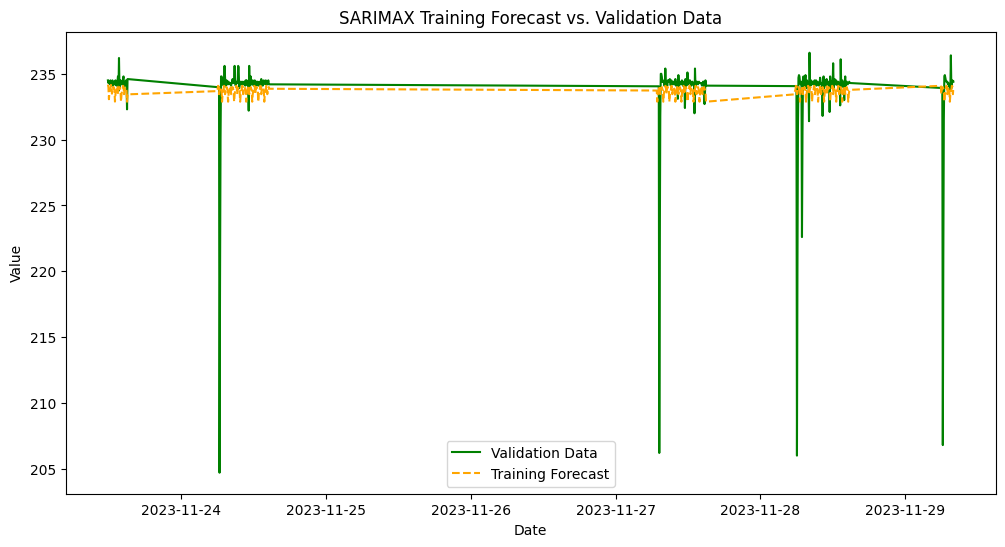

In [ ]:
# Lakukan prediksi untuk rentang waktu yang sama dengan validation data
forecast_training = pd.DataFrame({'ds': validation_data['ds'], 'yhat': forecast_train.values})

# Visualisasi hasil prediksi
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(validation_data['ds'], validation_data['y'], label='Validation Data', color='green')
ax.plot(forecast_training['ds'], forecast_training['yhat'], label='Training Forecast', linestyle='dashed', color='orange')

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('SARIMAX Training Forecast vs. Validation Data')

ax.legend()
# Tambahkan legend
plt.legend()

# Tampilkan plot
plt.show()

In [ ]:
print(forecast_training)

                      ds        yhat
7240 2023-11-23 11:51:58  234.179531
7241 2023-11-23 11:56:58  233.973411
7242 2023-11-23 12:01:58  233.068297
7243 2023-11-23 12:06:58  233.583724
7244 2023-11-23 12:11:58  233.795794
...                  ...         ...
7617 2023-11-29 07:38:19  233.780850
7618 2023-11-29 07:43:19  234.084884
7619 2023-11-29 07:48:19  234.047897
7620 2023-11-29 07:53:19  233.450497
7621 2023-11-29 07:58:19  233.893424

[382 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
actual_values_validation = validation_data['y']
forecasted_values_training = forecast_training['yhat'][:len(validation_data)]
actual = actual_values_validation.reset_index(drop=True)
predicted = forecasted_values_training.reset_index(drop=True)

def mape(actual, predicted):
  diffs = abs(actual - predicted)
  ratios = diffs / actual
  mape_val = 100 * ratios.mean()
  return mape_val

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mape = mape(actual, predicted)

print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)
print('MSE:', mse)

MAE: 1.1485801362849763
RMSE: 3.3495120251593393
MAPE: 0.5120480385519353
MSE: 11.219230806687019


## Suhu Sealing Vertikal Atas

In [ ]:
# Load data from Excel file

file_path = '/content/data_mean187window_vatemp.csv' #Mendefinisikan variabel file_path yang berisi jalur file Excel yang akan dimuat

df2 = pd.read_csv(file_path) #Menggunakan fungsi read_excel dari pandas untuk membaca file Excel di jalur yang telah ditentukan (file_path) dan menyimpannya ke dalam variabel data.

df2.head() #Menggunakan metode head() pada DataFrame untuk menampilkan beberapa baris pertama dari data yang telah dimuat

,datetime,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,198.8
1,2023-09-01 06:31:14,198.8
2,2023-09-01 06:36:14,198.8
3,2023-09-01 06:41:14,198.8
4,2023-09-01 06:46:14,198.8


In [ ]:
df2['datetime'] = pd.to_datetime(df2['datetime']) #Baris kode ini digunakan untuk mengonversi kolom dengan nama 'times' dalam DataFrame data menjadi tipe data datetime menggunakan fungsi pd.to_datetime

In [ ]:
print("Rows and Columns = ", df2.shape) #Ini memberikan informasi tentang ukuran (dimensi) DataFrame df.

Rows and Columns =  (7622, 2)


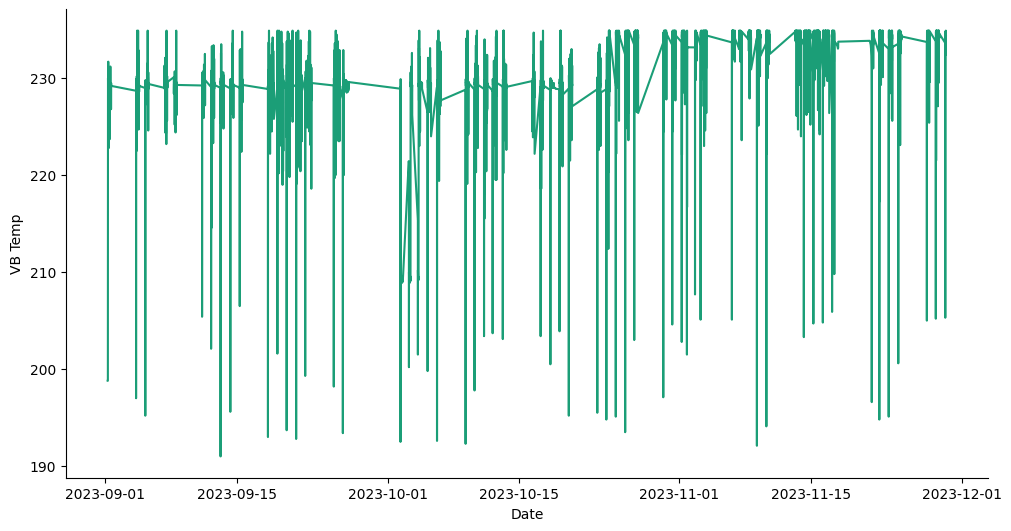

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_atas']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('VB Temp')

In [ ]:
train_size = 0.95  # Misalnya, 80% data untuk training
train_data, validation_data = train_test_split(df2, train_size=train_size, shuffle=False)

In [ ]:
# Print validation data
train_data.head()
train_data.shape
print(train_data)

                datetime  suhu_sealing_vertical_atas
0    2023-09-01 06:29:25                       198.8
1    2023-09-01 06:31:14                       198.8
2    2023-09-01 06:36:14                       198.8
3    2023-09-01 06:41:14                       198.8
4    2023-09-01 06:46:14                       198.8
...                  ...                         ...
7235 2023-11-23 11:26:58                       234.4
7236 2023-11-23 11:31:58                       234.4
7237 2023-11-23 11:36:58                       234.3
7238 2023-11-23 11:41:58                       234.3
7239 2023-11-23 11:46:58                       234.4

[7240 rows x 2 columns]


In [ ]:
validation_data.head()
validation_data.shape
print(validation_data)

                datetime  suhu_sealing_vertical_atas
7240 2023-11-23 11:51:58                       234.4
7241 2023-11-23 11:56:58                       234.2
7242 2023-11-23 12:01:58                       234.4
7243 2023-11-23 12:06:58                       234.4
7244 2023-11-23 12:11:58                       234.2
...                  ...                         ...
7617 2023-11-29 07:38:19                       234.0
7618 2023-11-29 07:43:19                       233.7
7619 2023-11-29 07:48:19                       234.2
7620 2023-11-29 07:53:19                       234.1
7621 2023-11-29 07:58:19                       234.3

[382 rows x 2 columns]


In [ ]:
train_data = train_data.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_atas': 'y'})
validation_data = validation_data.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_atas': 'y'})

future_df = pd.DataFrame({'ds': validation_data['ds']})

# Inisialisasi model SARIMAX
model = SARIMAX(train_data['y'], dataorder=(1,1,1), seasonal_order=(0,1,1,12)) #order dan seasonal order bisa diganti

model_fit = model.fit()

start_index = len(train_data)
end_index = start_index + len(future_df) - 1


forecast_validation = model_fit.predict(start=start_index, end=end_index)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['dataorder']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
print(future_df)

                      ds
7240 2023-11-23 11:51:58
7241 2023-11-23 11:56:58
7242 2023-11-23 12:01:58
7243 2023-11-23 12:06:58
7244 2023-11-23 12:11:58
...                  ...
7617 2023-11-29 07:38:19
7618 2023-11-29 07:43:19
7619 2023-11-29 07:48:19
7620 2023-11-29 07:53:19
7621 2023-11-29 07:58:19

[382 rows x 1 columns]


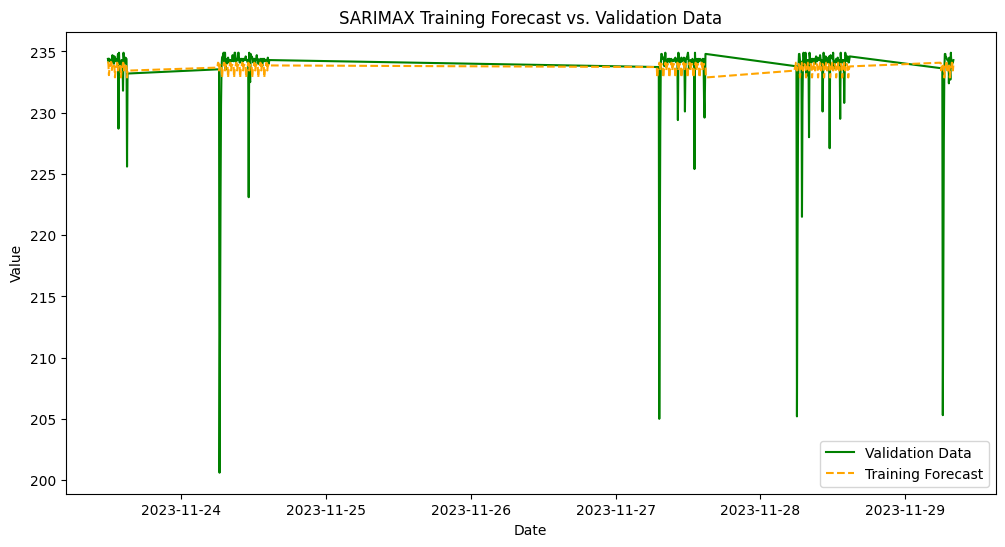

In [ ]:
forecast_training = pd.DataFrame({'ds': validation_data['ds'], 'yhat': forecast_train.values})

# Visualisasi hasil prediksi
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(validation_data['ds'], validation_data['y'], label='Validation Data', color='green')
ax.plot(forecast_training['ds'], forecast_training['yhat'], label='Training Forecast', linestyle='dashed', color='orange')

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('SARIMAX Training Forecast vs. Validation Data')

ax.legend()
# Tambahkan legend
plt.legend()

# Tampilkan plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

actual_values_validation = validation_data['y']
forecasted_values_training = forecast_training['yhat'][:len(validation_data)]
actual = actual_values_validation.reset_index(drop=True)
predicted = forecasted_values_training.reset_index(drop=True)

def mape(actual, predicted):
  diffs = abs(actual - predicted)
  ratios = diffs / actual
  mape_val = 100 * ratios.mean()
  return mape_val

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mape = mape(actual, predicted)

print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)
print('MSE:', mse)

MAE: 1.370000128858744
RMSE: 3.8992669589710194
MAPE: 0.6153631929620096
MSE: 15.2042828173231
